<a href="https://colab.research.google.com/github/ihssane2002/computer-vision-project/blob/main/Mod%C3%A8le_YOLOv8_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics --upgrade
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Extraire le fichier RAR
!unrar x /content/drive/MyDrive/fusion_dataset.rar /content/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/fusion_dataset.rar


Would you like to replace the existing file /content/fusion_dataset/data.yaml
   335 bytes, modified on 2025-04-18 14:49
with a new one
   335 bytes, modified on 2025-04-18 14:49

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit y

Extracting  /content/fusion_dataset/data.yaml                              0%  OK 

Would you like to replace the existing file /content/fusion_dataset/test/images/as_no_helmet2021-09-10_16-37-00_jpg.rf.8e4d5020030016d8dfd08243a5e60d41.jpg
 23721 bytes, modified on 2025-04-18 12:15
with a new one
 23721 bytes, modified on 2025-04-18 12:15

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
!mv /content/fusion_dataset/valid /content/fusion_dataset/val


mv: cannot stat '/content/fusion_dataset/valid': No such file or directory


In [ ]:
import os

dataset_path = '/content/fusion_dataset'

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")


fusion_dataset/
    val/
        labels/
        images/
    train/
        labels/
        images/
    test/
        labels/
        images/


In [ ]:
import os

base_path = '/content/fusion_dataset'

def count_files(dataset_type):
    image_dir = os.path.join(base_path, dataset_type, 'images')
    label_dir = os.path.join(base_path, dataset_type, 'labels')

    num_images = len([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
    num_labels = len([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    print(f"{dataset_type.upper()} : {num_images} images, {num_labels} labels")

for ds in ['train', 'val', 'test']:
    count_files(ds)


TRAIN : 4815 images, 4815 labels
VAL : 195 images, 195 labels
TEST : 101 images, 101 labels


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='/content/fusion_dataset/data.yaml', epochs=20, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 383MB/s]


Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fusion_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 132MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1697.8±1026.2 MB/s, size: 75.1 KB)


train: Scanning /content/fusion_dataset/train/labels... 4815 images, 9 backgrounds, 0 corrupt: 100%|██████████| 4815/4815 [00:02<00:00, 2074.66it/s]


train: New cache created: /content/fusion_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1180.4±677.2 MB/s, size: 92.0 KB)


val: Scanning /content/fusion_dataset/val/labels... 195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<00:00, 1083.58it/s]

val: New cache created: /content/fusion_dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.08G      1.744       2.82      1.658        112        640: 100%|██████████| 301/301 [01:48<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        195        488      0.836      0.591      0.667      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.46G      1.469      1.552      1.408        122        640: 100%|██████████| 301/301 [01:41<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        195        488      0.853      0.727      0.776      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.47G      1.388      1.291      1.344        133        640: 100%|██████████| 301/301 [01:43<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


                   all        195        488      0.755      0.729      0.789       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.47G      1.336      1.149       1.31        123        640: 100%|██████████| 301/301 [01:40<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        195        488       0.88      0.752      0.819      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.47G      1.288      1.048       1.28        125        640: 100%|██████████| 301/301 [01:44<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        195        488      0.914      0.679      0.821      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.47G      1.251     0.9713      1.259         91        640: 100%|██████████| 301/301 [01:42<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        195        488      0.771      0.791      0.804      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.47G      1.219     0.9103      1.239         99        640: 100%|██████████| 301/301 [01:41<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        195        488      0.926      0.776      0.865      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.47G      1.188     0.8669      1.224        107        640: 100%|██████████| 301/301 [01:40<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]

                   all        195        488      0.943       0.76      0.861      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.47G      1.169     0.8337      1.209        121        640: 100%|██████████| 301/301 [01:43<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        195        488       0.93      0.805      0.891      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.47G      1.154     0.8043      1.205         96        640: 100%|██████████| 301/301 [01:43<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        195        488      0.895      0.775      0.884      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.47G       1.09     0.7065      1.178         64        640: 100%|██████████| 301/301 [01:36<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        195        488      0.904      0.828      0.884      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.47G      1.058     0.6609      1.161         69        640: 100%|██████████| 301/301 [01:36<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        195        488       0.93       0.84      0.892      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.47G      1.041     0.6357      1.147         69        640: 100%|██████████| 301/301 [01:38<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        195        488      0.933      0.845      0.908       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.47G      1.009     0.6181      1.136         63        640: 100%|██████████| 301/301 [01:38<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        195        488      0.945      0.819      0.908      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.47G     0.9994     0.5954      1.126         70        640: 100%|██████████| 301/301 [01:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        195        488      0.943      0.849      0.895      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.47G     0.9824     0.5788      1.115         61        640: 100%|██████████| 301/301 [01:36<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


                   all        195        488      0.938      0.871      0.907      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.47G     0.9596      0.564      1.103         59        640: 100%|██████████| 301/301 [01:36<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        195        488      0.939      0.855      0.909      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.47G     0.9456     0.5493      1.097         69        640: 100%|██████████| 301/301 [01:38<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        195        488      0.933      0.877      0.916      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.47G     0.9311     0.5342      1.088         66        640: 100%|██████████| 301/301 [01:36<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        195        488      0.918      0.876       0.93      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.47G     0.9189     0.5289      1.081         73        640: 100%|██████████| 301/301 [01:38<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        195        488      0.923      0.883      0.935      0.681



20 epochs completed in 0.574 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        195        488      0.923      0.883      0.934      0.675
        May_Bom_Nuoc_A         17         25          1      0.548      0.819      0.599
        May_Bom_Nuoc_B        127        189      0.958      0.952      0.991      0.695
     May_Do_NhietDo_MT        136        250      0.803       0.92      0.876      0.613
           May_Do_Nuoc          8          8      0.912          1      0.995      0.791
                Person          9         16      0.941      0.993      0.991      0.678
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eb1cc424b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import shutil

save_path = '/content/drive/MyDrive/yolo_models/'

# Chemin du modèle entraîné
trained_model_path = '/content/runs/detect/train/weights/best.pt'

os.makedirs(save_path, exist_ok=True)

# Déplacer le modèle entraîné vers Google Drive
shutil.copy(trained_model_path, save_path)

print(f"Le modèle a été sauvegardé dans : {save_path}")


Le modèle a été sauvegardé dans : /content/drive/MyDrive/yolo_models/


**Test du modèle**


0: 640x640 1 May_Bom_Nuoc_A, 1 May_Do_NhietDo_MT, 11.2ms
Speed: 3.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


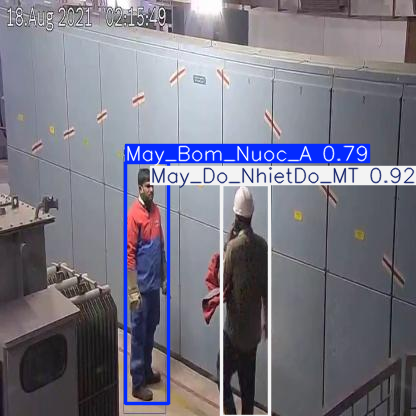

In [ ]:

# Charger une image de test
image = cv2.imread('/content/1.jpg')

# Faire des prédictions sur l'image
results = model(image)
results[0].show()




0: 640x640 1 May_Bom_Nuoc_A, 1 May_Bom_Nuoc_B, 1 May_Do_NhietDo_MT, 1 May_Do_Nuoc, 1 Person, 11.0ms
Speed: 4.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


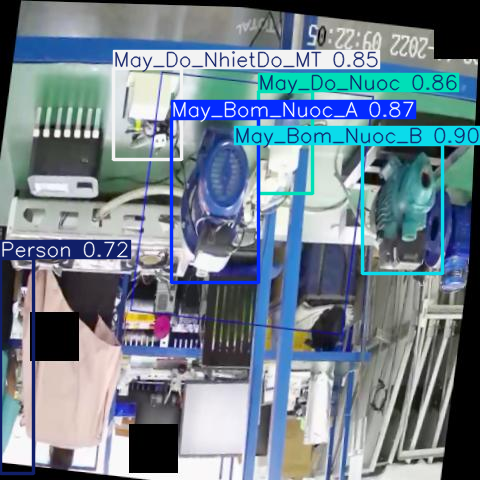

In [ ]:
# Charger une image de test
image = cv2.imread('/content/2.jpg')


results = model(image)
results[0].show()



**Détection du danger**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time
import torch
from ultralytics import YOLO

#  le modèle YOLO
model = YOLO('/content/drive/MyDrive/yolo_models/best.pt')

# La zone dangereuse
unsafe_zone = [(200, 200), (400, 400)]

def draw_unsafe_zone(frame, zone):
    cv2.rectangle(frame, zone[0], zone[1], (0, 0, 255), 2)

def is_person_in_unsafe_zone(x, y, w, h, zone):
    return zone[0][0] < x < zone[1][0] and zone[0][1] < y < zone[1][1]

def detect_danger_in_image(image_path):
    frame = cv2.imread(image_path)
    results = model(frame)[0]
    person_in_zone = False
    start_time = None
    score = 0
    # Dessiner la zone dangereuse
    draw_unsafe_zone(frame, unsafe_zone)

    # Parcourir les boîtes détectées
    for box in results.boxes:
        cls_id = int(box.cls[0].item())
        if cls_id != 0:
            continue
        x_center, y_center, w, h = box.xywh[0]
        x_center, y_center = int(x_center.item()), int(y_center.item())

        if is_person_in_unsafe_zone(x_center, y_center, w, h, unsafe_zone):
            person_in_zone = True
            if not start_time:
                start_time = time.time()
            cv2.rectangle(frame,
                          (int(x_center - w/2), int(y_center - h/2)),
                          (int(x_center + w/2), int(y_center + h/2)),
                          (0, 255, 0), 2)
        else:
            person_in_zone = False

    # Calculer le score
    if person_in_zone and start_time:
        elapsed_time = time.time() - start_time
        if elapsed_time >= 5:
            score = 1
        else:
            score = 0

    return score, frame



0: 640x640 1 May_Bom_Nuoc_A, 1 May_Bom_Nuoc_B, 1 May_Do_NhietDo_MT, 1 May_Do_Nuoc, 1 Person, 8.7ms
Speed: 3.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


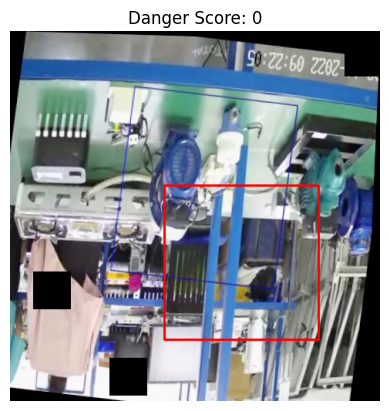

In [ ]:
image_path = '/content/2.jpg'

score, frame = detect_danger_in_image(image_path)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Danger Score: {score}")
plt.show()


**Calcul du Score 5S**


0: 640x640 1 May_Bom_Nuoc_A, 1 May_Do_NhietDo_MT, 8.9ms
Speed: 4.3ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


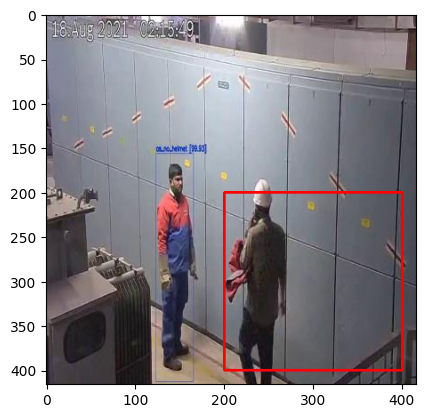

Score de sécurité : 0
Score 5S global : 0.80


In [ ]:
import cv2
import matplotlib.pyplot as plt
import time
import torch
from ultralytics import YOLO

# Charger le modèle YOLO
model = YOLO('/content/drive/MyDrive/yolo_models/best.pt')
unsafe_zone = [(200, 200), (400, 400)]

def draw_unsafe_zone(frame, zone):
    cv2.rectangle(frame, zone[0], zone[1], (0, 0, 255), 2)

def is_person_in_unsafe_zone(x, y, w, h, zone):
    return zone[0][0] < x < zone[1][0] and zone[0][1] < y < zone[1][1]

def calculate_5s_score(seiri_score, seiton_score, seiso_score, seiketsu_score, shitsuke_score):
    score_5s = (seiri_score + seiton_score + seiso_score + seiketsu_score + shitsuke_score) / 5
    return score_5s

def detect_danger_in_image(image_path):
    frame = cv2.imread(image_path)
    results = model(frame)[0]
    person_in_zone = False
    start_time = None
    score = 0
    # Dessiner la zone dangereuse
    draw_unsafe_zone(frame, unsafe_zone)

    # Variables pour calculer le score 5S
    seiri_score = 0.8
    seiton_score = 0.9
    seiso_score = 0.7
    seiketsu_score = 0.85
    shitsuke_score = 0.75

    # Parcourir les boîtes détectées
    for box in results.boxes:
        cls_id = int(box.cls[0].item())
        if cls_id != 0:
            continue
        x_center, y_center, w, h = box.xywh[0]
        x_center, y_center = int(x_center.item()), int(y_center.item())

        if is_person_in_unsafe_zone(x_center, y_center, w, h, unsafe_zone):
            person_in_zone = True
            if not start_time:
                start_time = time.time()
            cv2.rectangle(frame,
                          (int(x_center - w/2), int(y_center - h/2)),
                          (int(x_center + w/2), int(y_center + h/2)),
                          (0, 255, 0), 2)
        else:
            person_in_zone = False

    # Calculer le score 5S
    score_5s = calculate_5s_score(seiri_score, seiton_score, seiso_score, seiketsu_score, shitsuke_score)

    # Calculer le score de sécurité
    if person_in_zone and start_time:
        elapsed_time = time.time() - start_time
        if elapsed_time >= 5:
            score = 1
        else:
            score = 0

    return score, score_5s, frame

# Exemple d'utilisation
image_path = '/content/1.jpg'
score, score_5s, frame = detect_danger_in_image(image_path)

# Afficher l'image avec matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

print(f"Score de sécurité : {score}")
print(f"Score 5S global : {score_5s:.2f}")
